In [1]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [2]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

# transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel
# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV        
# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [3]:
# CSV

# Read in two csv files and concatenate them into a single DataFrame

transactions = pd.concat(
    (pd.read_csv("transactions_2014.csv"), 
     pd.read_csv("transactions_2015.csv")),
).drop(["Unnamed: 0"], axis=1)

transactions.head()

Date  Store_Number  Transaction_Count  target_pct  met_target  \
0  2014-01-01            25                840      0.3360       False   
1  2014-01-01            36                487      0.1948       False   
2  2014-01-02             1               1875      0.7500       False   
3  2014-01-02             2               2122      0.8488       False   
4  2014-01-02             3               3350      1.3400        True   

   bonus_payable  month  day_of_week  
0          False      1            2  
1          False      1            2  
2          False      1            3  
3          False      1            3  
4          False      1            3

In [4]:
# Excel 

# Read in two Excel sheets and concatenate them into a single DataFrame

transactions = pd.concat(
    pd.read_excel("DataForChandler.xlsx", sheet_name=[1, 2]),  #  specify sheets 1 and 2 to grab correct years
    ignore_index=True  #  specify to create consecutive index across sheets
).drop(["Unnamed: 0"], axis=1)  #  drop index col


In [5]:
# inspect head of df

transactions.head()

Date  Store_Number  Transaction_Count  target_pct  met_target  \
0 2014-01-01            25                840      0.3360       False   
1 2014-01-01            36                487      0.1948       False   
2 2014-01-02             1               1875      0.7500       False   
3 2014-01-02             2               2122      0.8488       False   
4 2014-01-02             3               3350      1.3400        True   

   bonus_payable  month  day_of_week  
0          False      1            2  
1          False      1            2  
2          False      1            3  
3          False      1            3  
4          False      1            3

In [6]:
# inspect tail of df

transactions.tail()

Date  Store_Number  Transaction_Count  target_pct  met_target  \
35479 2015-12-31            49               3828      1.5312        True   
35480 2015-12-31            50               2948      1.1792        True   
35481 2015-12-31            51               2892      1.1568        True   
35482 2015-12-31            53               2300      0.9200       False   
35483 2015-12-31            54               1572      0.6288       False   

       bonus_payable  month  day_of_week  
35479          False     12            3  
35480          False     12            3  
35481          False     12            3  
35482          False     12            3  
35483          False     12            3

In [7]:
# delete DataFrame from memory

del transactions

# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 

In [8]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])
stores = pd.read_csv("../retail/stores.csv")

In [9]:
retail.head()

id       date  store_nbr      family  sales  onpromotion
0  1945944 2016-01-01          1  AUTOMOTIVE    0.0            0
1  1945945 2016-01-01          1   BABY CARE    0.0            0
2  1945946 2016-01-01          1      BEAUTY    0.0            0
3  1945947 2016-01-01          1   BEVERAGES    0.0            0
4  1945948 2016-01-01          1       BOOKS    0.0            0

In [10]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [23]:
# Inner join stores to retail on 'store_nbr' column

retail_stores = retail.merge(stores,
                             # how="inner",
                             # left_on="store_nbr",
                             # right_on="store_nbr"
                            )

In [12]:
# Look at head of DataFrame to confirm Join as expected
retail_stores.head()

id       date  store_nbr      family  sales  onpromotion   city  \
0  1945944 2016-01-01          1  AUTOMOTIVE    0.0            0  Quito   
1  1945945 2016-01-01          1   BABY CARE    0.0            0  Quito   
2  1945946 2016-01-01          1      BEAUTY    0.0            0  Quito   
3  1945947 2016-01-01          1   BEVERAGES    0.0            0  Quito   
4  1945948 2016-01-01          1       BOOKS    0.0            0  Quito   

       state type  cluster  
0  Pichincha    D       13  
1  Pichincha    D       13  
2  Pichincha    D       13  
3  Pichincha    D       13  
4  Pichincha    D       13

In [13]:
# Look at info of joined DataFrame

retail_stores.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
 6   city         1054944 non-null  object        
 7   state        1054944 non-null  object        
 8   type         1054944 non-null  object        
 9   cluster      1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 305.4 MB


In [14]:
# Group joined DF by city, calculate sales by city, create bar plot from highest to lowest

(retail_stores
 .groupby(["city"])
 .agg({"sales": "sum"})
 .sort_values(by="sales", ascending=False
))#.plot.bar())

sales
city                       
Quito          2.476989e+08
Guayaquil      5.522230e+07
Cuenca         2.480080e+07
Ambato         1.693945e+07
Santo Domingo  1.683743e+07
Machala        1.556695e+07
Cayambe        1.169848e+07
Manta          9.973213e+06
Daule          8.739034e+06
Latacunga      8.667336e+06
Babahoyo       7.659121e+06
Loja           7.450493e+06
Esmeraldas     7.268992e+06
Libertad       7.074044e+06
Quevedo        5.664121e+06
Guaranda       5.464728e+06
El Carmen      5.013667e+06
Salinas        4.791598e+06
Ibarra         4.762224e+06
Riobamba       4.708914e+06
Puyo           3.577596e+06
Playas         3.292171e+06

<Axes: xlabel='city'>

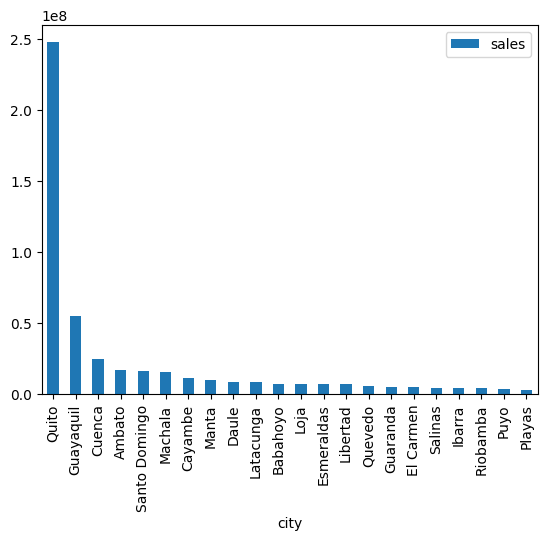

In [15]:
(retail_stores
 .groupby(["city"])
 .agg({"sales": "sum"})
 .sort_values(by="sales", ascending=False
).plot.bar())

In [16]:
# Create pivot table with date in index and type as column, cells are sum sales for type/day
# then create a line plot with increased figure size

retail_stores.pivot_table(
    index=["date"], 
    columns="type", 
    values="sales", 
    aggfunc="sum"
)#.plot(figsize=(10, 10))

type                    A              B              C              D  \
date                                                                     
2016-01-01       0.000000       0.000000       0.000000   16433.394000   
2016-01-02  379618.188950  161753.924970  160188.711980  311745.651960   
2016-01-03  447037.130028  191999.867994  159407.764000  356319.037883   
2016-01-04  302539.623005  130359.379032  144323.110965  324389.623090   
2016-01-05  257060.245980  126464.769010  131458.040020  261540.672979   
...                   ...            ...            ...            ...   
2017-08-11  293910.017024  111816.820980  117835.996000  243609.017008   
2017-08-12  259813.825145  108583.105012  135502.780020  229040.695902   
2017-08-13  296839.088030  130153.252046  122696.002969  241745.739426   
2017-08-14  234031.923004  115843.792001  126485.525990  232315.725075   
2017-08-15  220464.355977  122307.633986  141869.223000  215126.683976   

type                   E  
date                      
2016-01-01      0.000000  
2016-01-02  53370.947002  
2016-01-03  71971.919990  
2016-01-04  54345.139005  
2016-01-05  58796.711100  
...                  ...  
2017-08-11  59201.871010  
2017-08-12  59690.129000  
2017-08-13  74205.595000  
2017-08-14  52245.440010  
2017-08-15  62894.039000  

[592 rows x 5 columns]

<Axes: xlabel='date'>

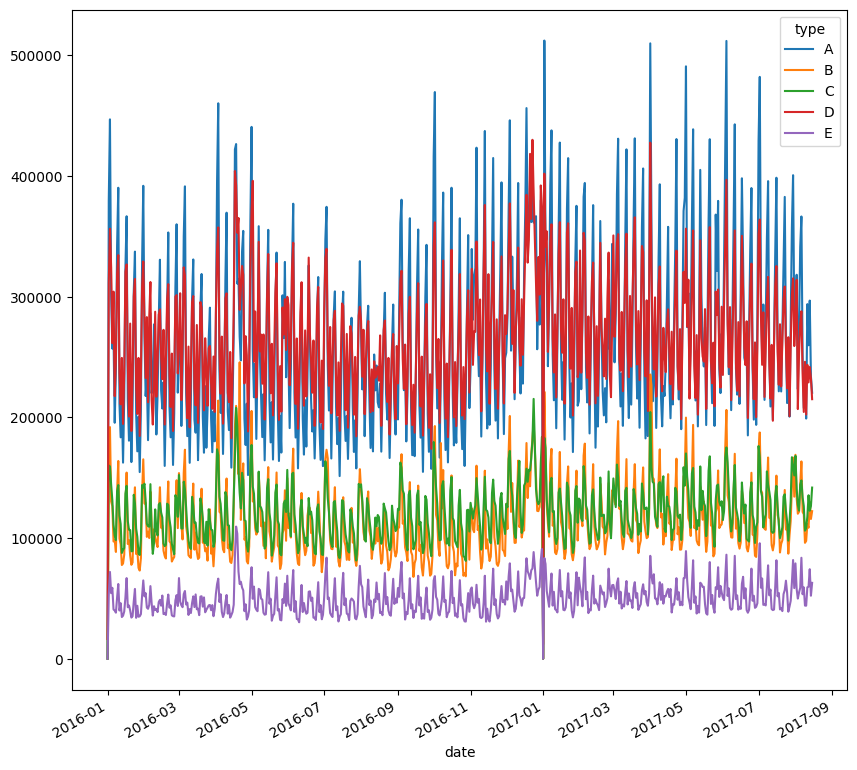

In [17]:
retail_stores.pivot_table(
    index=["date"], 
    columns="type", 
    values="sales", 
    aggfunc="sum"
).plot(figsize=(10, 10))

In [18]:
# Create pivot table with type in index and month as column, cells are sum sales for type/day
# Note: You may have chosen row as month and type as column, that's fine too!

retail_stores.pivot_table(
    index="type", 
    columns=retail_stores["date"].dt.month, 
    values="sales", 
    aggfunc="mean"
)# .T.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1)) # T, or transpose flips the DataFrame by its axes

date          1           2           3           4           5           6   \
type                                                                           
A     892.510618  849.040153  860.987078  924.925862  903.669492  867.895269   
B     425.305919  425.767210  431.077110  490.007193  446.819507  424.275922   
C     234.780468  235.412919  239.278937  262.757895  253.681964  236.828785   
D     453.746330  442.967996  449.928504  464.709459  455.120281  442.627440   
E     365.821677  369.084202  368.068777  410.137142  389.894748  365.727210   

date          7           8           9           10          11           12  
type                                                                           
A     888.838808  807.431406  818.095466  853.665327  929.728589  1085.823917  
B     439.855592  409.965235  377.427883  398.611356  389.948604   522.541905  
C     244.245370  237.832738  233.428480  236.659325  243.029253   290.871174  
D     439.740208  405.716248  408.229809  425.776457  464.768699   540.664057  
E     393.068556  391.098384  353.010235  351.093056  348.283566   472.978320

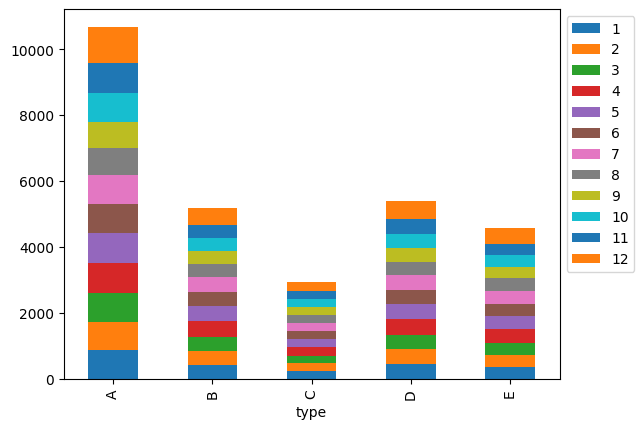

In [19]:
retail_stores.pivot_table(
    index="type", 
    columns=retail_stores["date"].dt.month, 
    values="sales", 
    aggfunc="mean"
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

In [21]:
retail_stores.pivot_table(
    index="type", 
    columns=retail_stores["date"].dt.month, 
    values="sales", 
    aggfunc="mean"
).T # .plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

type            A           B           C           D           E
date                                                             
1      892.510618  425.305919  234.780468  453.746330  365.821677
2      849.040153  425.767210  235.412919  442.967996  369.084202
3      860.987078  431.077110  239.278937  449.928504  368.068777
4      924.925862  490.007193  262.757895  464.709459  410.137142
5      903.669492  446.819507  253.681964  455.120281  389.894748
6      867.895269  424.275922  236.828785  442.627440  365.727210
7      888.838808  439.855592  244.245370  439.740208  393.068556
8      807.431406  409.965235  237.832738  405.716248  391.098384
9      818.095466  377.427883  233.428480  408.229809  353.010235
10     853.665327  398.611356  236.659325  425.776457  351.093056
11     929.728589  389.948604  243.029253  464.768699  348.283566
12    1085.823917  522.541905  290.871174  540.664057  472.978320

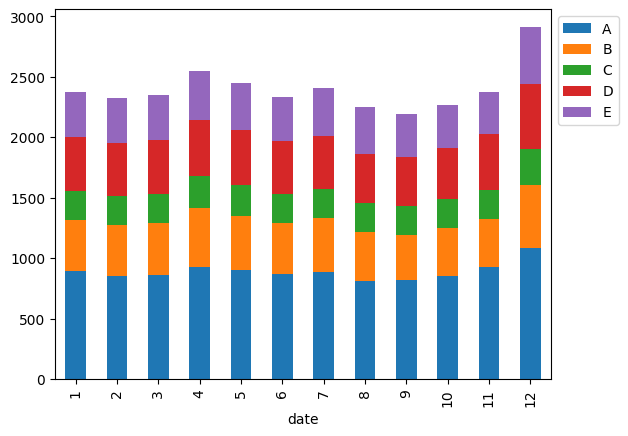

In [22]:
retail_stores.pivot_table(
    index="type", 
    columns=retail_stores["date"].dt.month, 
    values="sales", 
    aggfunc="mean"
).T.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

In [24]:
# Delete DataFrames used in join

del [retail, stores]

In [25]:
retail.head()

NameError: name 'retail' is not defined